In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

plt.style.use(['bmh', "matplotlibrc"])

import country_converter as coco

cc = coco.CountryConverter()

# country = "MR"
country = snakemake.wildcards.exporter

# fn = f"../results/default/2040/shipping-lh2/{country}-T0500/lcoes.csv"
fn = snakemake.input["lcoes"]

df = pd.read_csv(fn)


In [59]:
df['annual generation'] /= 1e6
df['cumulative generation'] /= 1e6

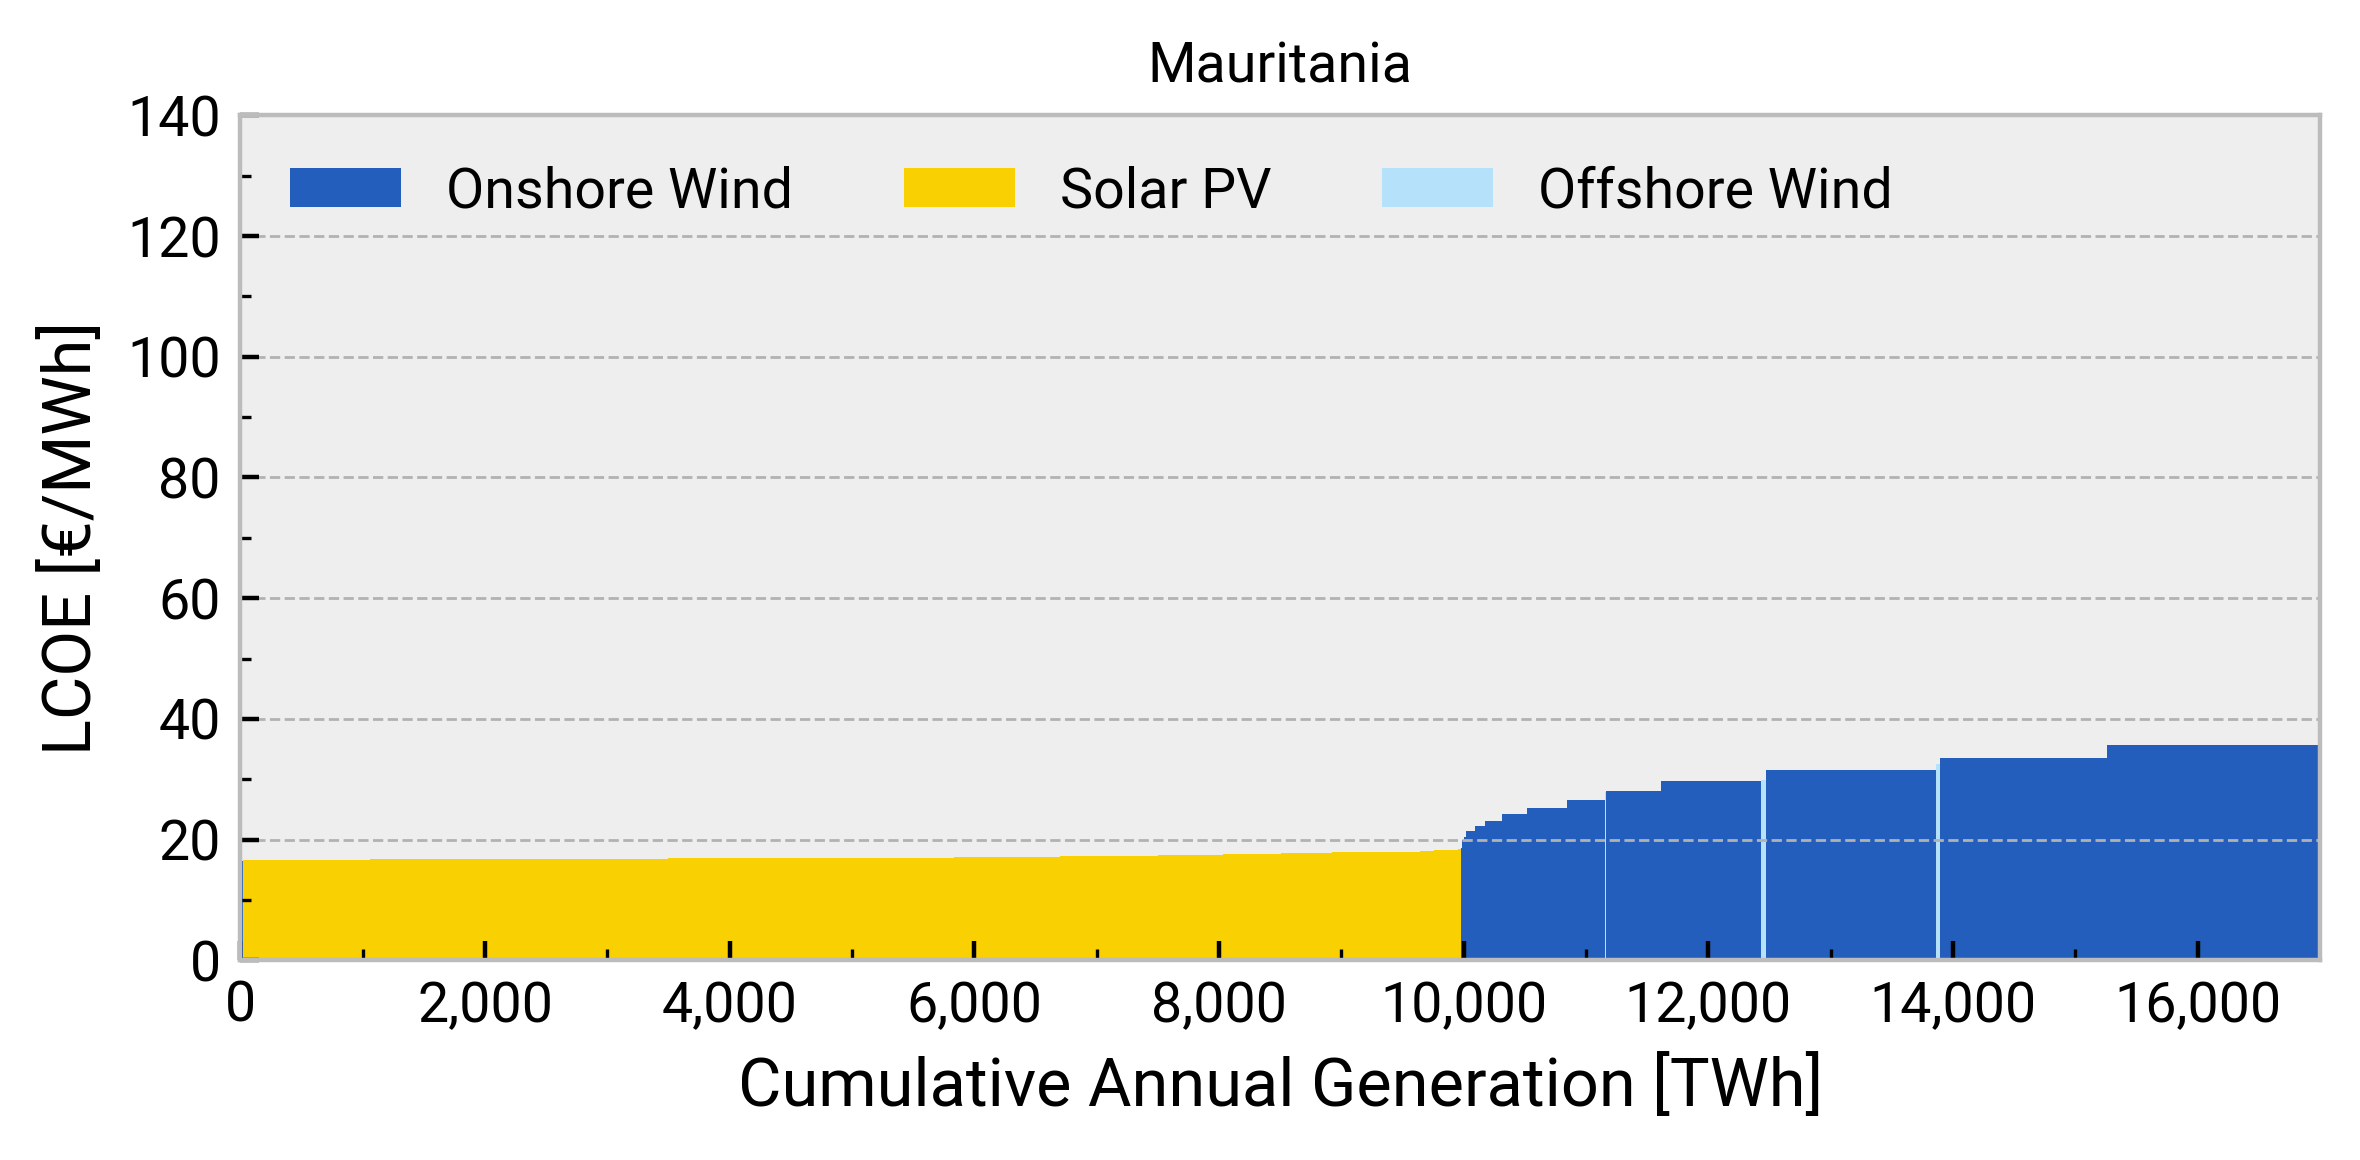

In [ ]:
df_sorted = df


TECH_COLORS = {'onwind': '#235ebc', 'solar-utility': '#f9d002', 'offwind': '#b5e2fa'}  # Add more as needed
NICE_NAMES = {
    "onwind": "Onshore Wind",
    "solar-utility": "Solar PV",
    "offwind": "Offshore Wind",
}

# Create the stacked bar plot
fig, ax = plt.subplots(figsize=(6, 3))

left = 0
for _, row in df_sorted.iterrows():
    # hatch = "..." if row["reserved share"] > 0 else None
    ax.bar(left, row['lcoe'], width=row['annual generation'], 
           bottom=0, color=TECH_COLORS[row['technology']], align='edge', linewidth=0)
    left += row['annual generation']

ax.set_xlabel('Cumulative Annual Generation [TWh]')
ax.set_ylabel('LCOE [€/MWh]')

country_split = country.split("-")
suffix = "" if len(country_split) == 1 else f" ({country_split[1]})"
country_label = cc.convert(country_split[0], to="name_short")
ax.set_title(country_label + suffix, fontsize=10)

legend_elements = [plt.Rectangle((0,0),1,1, facecolor=color) 
                   for color in TECH_COLORS.values()]
ax.legend(legend_elements, [NICE_NAMES[k] for k in TECH_COLORS.keys()], loc='upper left', ncol=3)

ax.set_xlim(0, 17000)
ax.set_ylim(0, 140)

ax.set_yticks(np.arange(0, 150, 20))
ax.set_yticks(np.arange(10, 150, 20), minor=True)
ax.set_xticks(np.arange(0, 17000, 2000))
ax.set_xticks(np.arange(1000, 17000, 2000), minor=True)

def thousands_formatter(x, pos):
    return f'{x:,.0f}'

ax.xaxis.set_major_formatter(FuncFormatter(thousands_formatter))

ax.grid(axis='x')

plt.tight_layout()

for fn in snakemake.output.fig:
    plt.savefig(fn)